# **ESTUDIO EXPLORATORIO DE DATOS (EDA) SOBRE LA SOSTENIBILIDAD EN LA INDUSTRIA TEXTIL**
<center>por Yolanda Pérez San Segundo</center>                                                      

La <font color="#33ff4f">sostenibilidad</font>, el reciclaje de plásticos y el <font color="#33ff4f">impacto ambiental de la industria textil</font> son temas de gran importancia en la actualidad. Los textiles a base de plástico están en la intersección de estos temas.

Con los datos encontrados podemos valorar el impacto ambiental que tiene la industria textil, diferenciando por países, años, marcas, etc.

![imagen](https://www.datacolor.com/wp-content/uploads/2021/07/shutterstock_1474085432-900x500.jpg)

# 🏷️**HIPÓTESIS**

* 1.- Las marcas con una calificación de sostenibilidad más alta tienden a tener una menor huella de carbono, menor uso de agua y menor producción de residuos.

* 2.- La calificación de sostenibilidad promedio de las marcas ha mejorado con el tiempo.

* 3.- La huella de carbono promedio, el uso de agua y la producción de residuos por marca han disminuido con el tiempo (debido a avances tecnológicos y una mayor conciencia ambiental).

* 4.- La proporción de marcas que adoptan prácticas de fabricación eco-friendly y ofrecen programas de reciclaje ha aumentado con el tiempo.

* 5.- La huella de carbono promedio, el uso de agua promedio y de la producción de residuos promedio varían significativamente entre países.

* 6- Hay correlación significativamente entre la huella de carbono, el uso de agua y de la producción de residuos entre países.

* 7.- La 'Market_Trend' de los productos podría variar según el país.

* 8.- El nivel de sostenibilidad, inferido de la 'Sustainability_Rating', varía significativamente entre los diferentes países.

----------------------------------------------------------------------------------------------------------

### 📂**FUENTES DE DATOS**

### 📚**Importamos librerías**

In [128]:
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### 💻**Dataset**

In [129]:
df = pd.read_csv("../data/Sustainable_Fashion_Trends.csv") #Leer csv con el que voy a trabajar
df

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,BRAND-4996,Brand_4996,Brazil,2010,A,Organic Cotton,Yes,423.73,251736.61,50532.28,No,1,490.95,Stable,NaN
4996,BRAND-4997,Brand_4997,Germany,2012,C,Bamboo Fabric,Yes,68.24,2342347.78,64214.57,Yes,13,53.92,Stable,Fair Trade
4997,BRAND-4998,Brand_4998,Japan,2023,D,Vegan Leather,Yes,321.12,317800.67,81467.21,Yes,12,431.32,Stable,NaN
4998,BRAND-4999,Brand_4999,India,2016,A,Tencel,No,124.83,927539.68,34506.22,Yes,20,322.95,Declining,Fair Trade


### 🧽**Limpiar DataFrame**

↠ **Eliminar columna Brand_ID**

In [137]:
df1 = df.drop('Brand_ID', axis=1)

↠ **Cambiar los valores de la columna Sustainability_Rating por valores numéricos**

A (Excelente) = 1

B (Muy bien) = 2

C (Bien) = 3

D (Correcto) = 4

In [139]:
#Según la clasificación medioambiental A es Excelente, B es Muy Bueno, C es Bueno y D es Correcto, y pasan a ser 1, 2, 3 y 4.

#Defino un diccionario de reemplazo
replacement_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4};

#Realizo todos los reemplazos a la vez usando el diccionario
df1['Sustainability_Rating'] = df1['Sustainability_Rating'].replace(replacement_dict);

-------------------------------------------------------------------------------------------------------

### 🏷️**HIPÓTESIS 1:** *Las marcas con una calificación de sostenibilidad más alta tienden a tener una menor huella de carbono, menor uso de agua y menor producción de residuos.*

🔎**Análisis por grupos de calificación de sostenibilidad**

In [140]:
grouped_data = df1.groupby('Sustainability_Rating')[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG']].mean()

📊 **Gráfica: Promedio de Huella de Carbono por Calificación de Sostenibilidad**

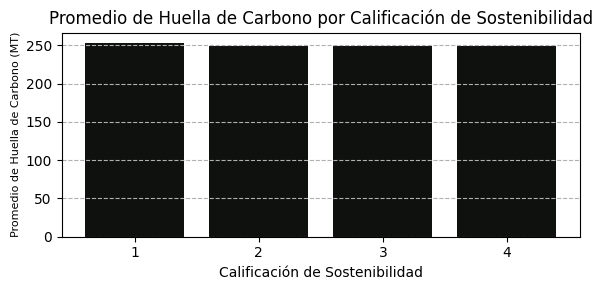

In [ ]:
plt.figure(figsize=(6, 3))
plt.bar(grouped_data.index, grouped_data['Carbon_Footprint_MT'], color="#0f110f")
plt.xlabel('Calificación de Sostenibilidad')
plt.ylabel('Promedio de Huella de Carbono (MT)' , fontsize=8)
plt.title('Promedio de Huella de Carbono por Calificación de Sostenibilidad')
plt.xticks(grouped_data.index)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig("../images/promedio_carbon_sostenibilidad.jpg")

📊 **Gráfica: Promedio de Uso de Agua por Calificación de Sostenibilidad**

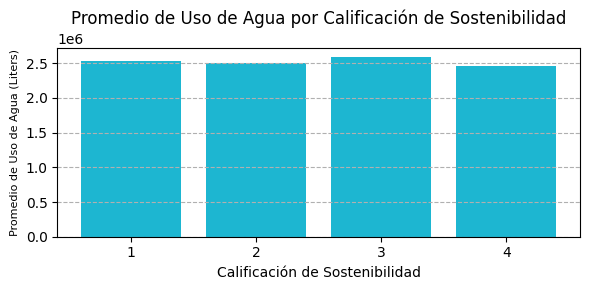

In [ ]:
plt.figure(figsize=(6, 3))
plt.bar(grouped_data.index, grouped_data['Water_Usage_Liters'], color="#1db6d1")
plt.xlabel('Calificación de Sostenibilidad')
plt.ylabel('Promedio de Uso de Agua (Liters)' , fontsize=8)
plt.title('Promedio de Uso de Agua por Calificación de Sostenibilidad')
plt.xticks(grouped_data.index)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig("../images/promedio_agua_sostenibilidad.jpg")

📊 **Gráfica: Promedio de Prducción de Desperdicios por Calificación de Sostenibilidad**

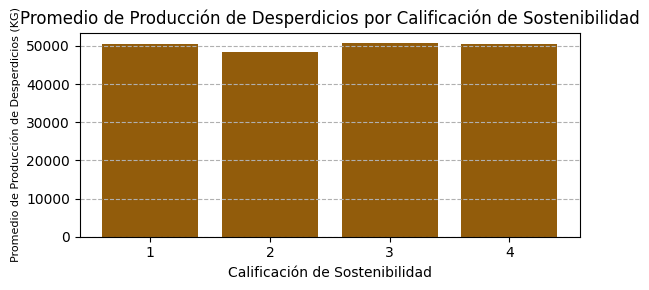

In [ ]:
plt.figure(figsize=(6, 3))
plt.bar(grouped_data.index, grouped_data['Waste_Production_KG'], color="#925C0B")
plt.xlabel('Calificación de Sostenibilidad')
plt.ylabel('Promedio de Producción de Desperdicios (KG)', fontsize=8)
plt.title('Promedio de Producción de Desperdicios por Calificación de Sostenibilidad')
plt.xticks(grouped_data.index)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig("../images/promedio_desperdicios_sostenibilidad.jpg")

🔎**Calculo de la correlación entre la calificación de sostenibilidad y las métricas de impacto ambiental**

In [147]:
correlation_carbon = df1['Sustainability_Rating'].corr(df1['Carbon_Footprint_MT'])
correlation_water = df1['Sustainability_Rating'].corr(df1['Water_Usage_Liters'])
correlation_waste = df1['Sustainability_Rating'].corr(df1['Waste_Production_KG'])

📊 **Gráfica: Correlación entre la calificación de sostenibilidad y las métricas de impacto ambiental**

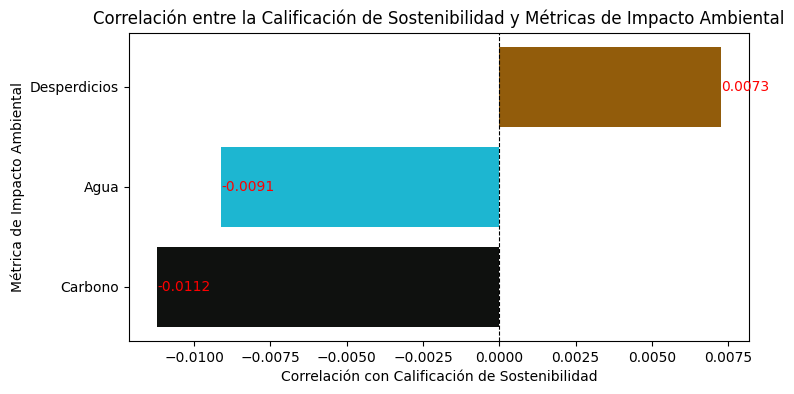

In [ ]:
correlations_data = pd.DataFrame({
    'Métrica': ['Carbono', 'Agua', 'Desperdicios'],
    'Correlación': [correlation_carbon, correlation_water, correlation_waste]
})

plt.figure(figsize=(8, 4))
plt.barh(correlations_data['Métrica'], correlations_data['Correlación'], color=["#0f110f", "#1db6d1", "#925C0B"])
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Línea de referencia en cero
plt.ylabel('Métrica de Impacto Ambiental')
plt.xlabel('Correlación con Calificación de Sostenibilidad')
plt.title('Correlación entre la Calificación de Sostenibilidad y Métricas de Impacto Ambiental')

for index, value in enumerate(correlations_data['Correlación']):
    plt.text(value, index, f'{value:.4f}', va='center', ha='left', color= "red")

plt.savefig("../images/correlacion_sostenibilidad_metricas")

✏️**Conclusión**

- **Valoración del Resultado de la Correlación entre la Calificación de Sostenibilidad y la Huella de Carbono:**

*-0.01121011927495179*
El signo negativo indica una correlación negativa. Esto significa que a medida que los valores de una variable tienden a aumentar, los valores de la otra variable tienden a disminuir, en promedio. En tu caso, sugiere que a medida que la 'Sustainability_Rating' tiende a ser más alta, la 'Carbon_Footprint_MT' tiende a ser ligeramente más baja.

Al estar el valor de -0.0112 muy cerca de 0, significa que la correlación lineal entre la 'Sustainability_Rating' y la 'Carbon_Footprint_MT' es extremadamente débil, casi inexistente. En resumen, Una calificación de sostenibilidad más alta no implica consistentemente una huella de carbono notablemente menor (ni mayor, en realidad), y viceversa.


- **Valoración del Resultado de la Correlación entre la Calificación de Sostenibilidad y el Uso de Agua:**

*-0.009114263326759579*
El signo negativo indica una correlación negativa, aunque muy débil. Esto implicaría que a medida que la 'Sustainability_Rating' tiende a ser más alta, el 'Water_Usage_Liters' tiende a ser ligeramente más bajo.

Al estar el valor de 0.0091 extremadamente cerca de 0, significa que la correlación lineal entre la 'Sustainability_Rating' y el 'Water_Usage_Liters' es prácticamente nula. En resumen, Una mayor calificación de sostenibilidad no está asociada de manera consistente con un uso de agua notablemente menor (ni mayor).


- **Valoración del Resultado de la Correlación entre la Calificación de Sostenibilidad y la Producción de Desperdicios:**

*0.007255562579773474*
El signo positivo indica una correlación positiva, aunque muy débil. Esto implicaría que a medida que la 'Sustainability_Rating' tiende a ser más alta, la 'Waste_Production_KG' tiende a ser ligeramente más alta.

Al estar el valor de 0.0073 extremadamente cerca de 0, significa que la correlación lineal entre la 'Sustainability_Rating' y la 'Waste_Production_KG' es prácticamente nula. En resumen, una mayor calificación de sostenibilidad no está asociada de manera consistente con una producción de residuos notablemente menor (de hecho, la ligera tendencia sugiere lo contrario, aunque insignificante).

👖**En general, estos resultados sugieren que no existe una relación lineal fuerte o consistente entre la calificación de sostenibilidad y las métricas de impacto ambiental (huella de carbono, uso de agua y producción de residuos). Por lo tanto, basándome en este análisis de correlación lineal, la Hipótesis 1 no se sostiene con estos datos.**

------------------------------------------------------------------------------------------------------

### 🏷️**HIPÓTESIS 2:** *La calificación de sostenibilidad promedio de las marcas ha mejorado con el tiempo.*

🔎**Análisis: Agrupo por 'Year' y calculo la calificación de sostenibilidad promedio**

In [149]:
average_sustainability_by_year = df1.groupby('Year')['Sustainability_Rating'].mean()

📊 **Gráfica: Tendencia de la Calificación de Sostenibilidad Promedio a lo Largo del Tiempo**

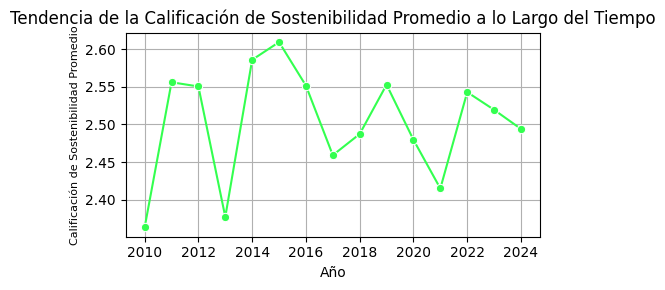

In [151]:
plt.figure(figsize=(5, 3))
sns.lineplot(x=average_sustainability_by_year.index, y=average_sustainability_by_year.values, marker='o', color= "#33ff4f")
plt.xlabel('Año')
plt.ylabel('Calificación de Sostenibilidad Promedio', fontsize=8)
plt.title('Tendencia de la Calificación de Sostenibilidad Promedio a lo Largo del Tiempo')
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/sostenibilidad_promedio_years")

✏️**Conclusión**

**Análisis de la Calificación de Sostenibilidad Promedio por Año:**

Observando los valores promedio de la calificación de sostenibilidad año por año, no se aprecia una tendencia lineal ascendente clara y consistente. Hay fluctuaciones a lo largo del tiempo:

Aumento inicial: Hubo un aumento notable del promedio entre 2010 (2.36) y 2011 (2.56).
Estabilidad y fluctuaciones: Desde 2011 hasta 2016, el promedio se mantuvo relativamente estable, con ligeras subidas y bajadas, rondando el 2.55.
Descenso y recuperación: Se observa un descenso en 2017 (2.46) y 2018 (2.49), seguido de una recuperación en 2019 (2.55).
Ligera tendencia a la baja: Después de 2019, parece haber una ligera tendencia a la baja, aunque con algunas variaciones (2022 muestra un repunte).

👖*Conclusión Preliminar sobre la Hipótesis 2:*

Basándonos en estos promedios anuales, no hay una evidencia clara de que la calificación de sostenibilidad promedio de las marcas haya mejorado de manera constante con el tiempo en tu dataset. Si bien hubo un aumento inicial, la tendencia general es más bien de fluctuación alrededor de un valor medio, sin un crecimiento sostenido a lo largo de los años observados.

**En resumen, según los promedios anuales, la Hipótesis 2 no se sostiene de manera concluyente en este dataset. La calificación de sostenibilidad promedio no muestra una mejora constante a lo largo del tiempo, sino más bien una variabilidad con algunos altibajos.**

--------------

### 🏷️**HIPÓTESIS 3:** *La huella de carbono promedio, el uso de agua y la producción de residuos por marca han disminuido con el tiempo.*

🔎**Análisis: Agrupo por año y calculo el Promedio de cada métrica ambiental**

In [153]:
average_impact_by_year = df1.groupby('Year')[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG']].mean().reset_index()

📊 **Gráfica: Tendencia del Promedio de Huella de Carbono a lo Largo del Tiempo**

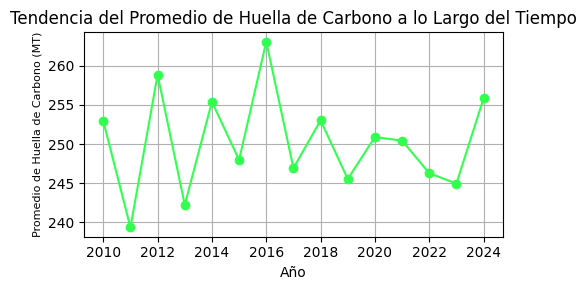

In [157]:
plt.figure(figsize=(5, 3))
plt.plot(average_impact_by_year['Year'], average_impact_by_year['Carbon_Footprint_MT'], marker='o', linestyle='-', color="#33ff4f")
plt.xlabel('Año')
plt.ylabel('Promedio de Huella de Carbono (MT)', fontsize=8)
plt.title('Tendencia del Promedio de Huella de Carbono a lo Largo del Tiempo')
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/tendencia_carbon_por_año.jpg")

📊 **Gráfica: Tendencia del Promedio de Uso de Agua a lo Largo del Tiempo**

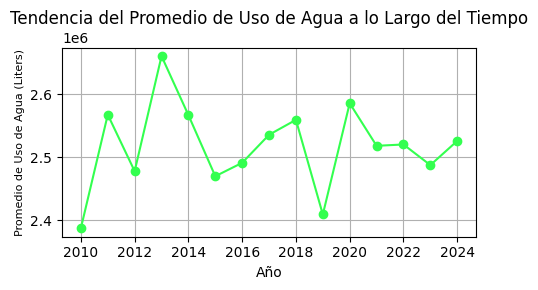

In [158]:
plt.figure(figsize=(5, 3))
plt.plot(average_impact_by_year['Year'], average_impact_by_year['Water_Usage_Liters'], marker='o', linestyle='-', color="#33ff4f")
plt.xlabel('Año')
plt.ylabel('Promedio de Uso de Agua (Liters)', fontsize=8)
plt.title('Tendencia del Promedio de Uso de Agua a lo Largo del Tiempo')
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/tendencia_agua_por_año.jpg")

📊 **Gráfica: Tendencia del Promedio de Producción de Residuos a lo Largo del Tiempo**

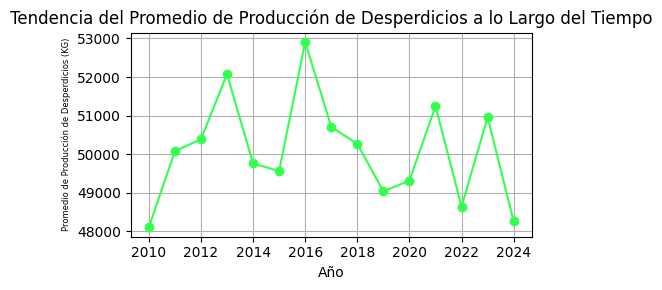

In [159]:
plt.figure(figsize=(5, 3))
plt.plot(average_impact_by_year['Year'], average_impact_by_year['Waste_Production_KG'], marker='o', linestyle='-', color="#33ff4f")
plt.xlabel('Año')
plt.ylabel('Promedio de Producción de Desperdicios (KG)', fontsize=6)
plt.title('Tendencia del Promedio de Producción de Desperdicios a lo Largo del Tiempo')
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/tendencia_desperdicios_por_año.jpg")

✏️**Conclusión**

**Análisis por Métrica a lo Largo del Tiempo:**

*Huella de Carbono (Carbon_Footprint_MT):*

Los valores fluctúan a lo largo de los años.
No se observa una tendencia lineal clara de disminución constante.
Hay años con picos (ej., 2016) y valles (ej., 2011, 2023).
El valor más bajo se da en 2011 (239.34) y el más alto en 2016 (263.10).
Los últimos años (2022-2024) muestran valores que no son consistentemente más bajos que los iniciales.

*Uso de Agua (Water_Usage_Liters):*

Los valores se mantienen en un rango relativamente estrecho, alrededor de 2.4 a 2.6 millones de litros.
No se aprecia una tendencia marcada de disminución o aumento sostenido.
Hay variaciones anuales, pero no son drásticas.
El valor más bajo se da en 2019 (2.41e+06) y el más alto en 2013 (2.66e+06).

*Producción de Residuos (Waste_Production_KG):*

Los valores también muestran fluctuaciones anuales.
No hay una tendencia clara de disminución constante.
Se observan picos (ej., 2013, 2016) y valles (ej., 2019, 2022).
El valor más bajo se da en 2019 (49037.26) y el más alto en 2016 (52905.87).


👖**Basándonos en estos promedios anuales, no hay una evidencia clara que respalde la hipótesis 3 de una disminución constante a lo largo del tiempo para ninguna de las tres métricas.**

*Huella de Carbono*: Muestra variabilidad sin una dirección descendente consistente.
*Uso de Agua*: Se mantiene relativamente estable con fluctuaciones.
*Producción de Residuos*: También muestra variabilidad sin una tendencia clara a la baja.

-----------------------

### 🏷️**HIPÓTESIS 4:** *La proporción de marcas que adoptan prácticas de fabricación eco-friendly y ofrecen programas de reciclaje ha aumentado con el tiempo.*

🔎**Análisis: Calculo la Proporción Anual de Marcas con Prácticas Sostenibles**

In [160]:
total_brands_by_year = df1.groupby('Year')['Brand_Name'].nunique()
eco_friendly_counts = df1[df1['Eco_Friendly_Manufacturing'] == 'Yes'].groupby('Year')['Brand_Name'].nunique()
recycling_counts = df1[df1['Recycling_Programs'] == 'Yes'].groupby('Year')['Brand_Name'].nunique()
proportion_eco_friendly = (eco_friendly_counts / total_brands_by_year).fillna(0)
proportion_recycling = (recycling_counts / total_brands_by_year).fillna(0)

📊 **Gráfica: Tendencia de marcas con prácticas sostenibles a lo Largo del Tiempo**

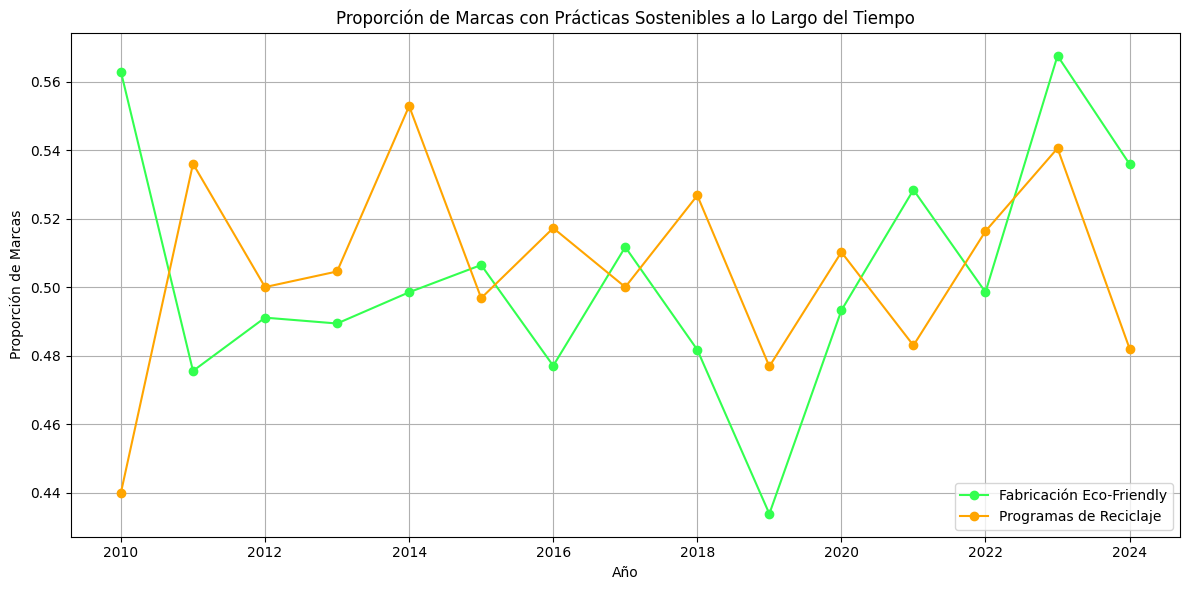

In [161]:
plt.figure(figsize=(12, 6))
plt.plot(proportion_eco_friendly.index, proportion_eco_friendly.values, marker='o', label='Fabricación Eco-Friendly', color="#33ff4f" )
plt.plot(proportion_recycling.index, proportion_recycling.values, marker='o', label='Programas de Reciclaje', color="orange")
plt.xlabel('Año')
plt.ylabel('Proporción de Marcas')
plt.title('Proporción de Marcas con Prácticas Sostenibles a lo Largo del Tiempo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/practicas_sostenibles_años.jpg")

✏️**Conclusión**

**Análisis de la Proporción de Marcas con Fabricación Eco-Friendly por Año:**

Los valores fluctúan a lo largo de los años, sin una tendencia ascendente clara y consistente.
La proporción varía entre aproximadamente 0.47 (47%) y 0.57 (57%).
No se observa un aumento sostenido en la adopción de prácticas eco-friendly a lo largo del tiempo. Hay años con proporciones más altas y más bajas sin un patrón lineal ascendente.

**Análisis de la Proporción de Marcas con Programas de Reciclaje por Año:**

Al igual que con la fabricación eco-friendly, la proporción de marcas con programas de reciclaje también fluctúa a lo largo de los años.
La proporción varía entre aproximadamente 0.44 (44%) y 0.55 (55%).
Tampoco se aprecia una tendencia ascendente clara y constante en la oferta de programas de reciclaje a lo largo del tiempo. Hay altibajos anuales sin un crecimiento sostenido.

👖**En resumen, basándonos en estas proporciones anuales, no hay una evidencia clara que respalde la hipótesis 4 de un aumento constante a lo largo del tiempo para ninguna de las dos prácticas sostenibles analizadas. Es necesario un análisis más detallado para confirmar o refutar la presencia de tendencias significativas.**

-------------------

### 🏷️**HIPÓTESIS 5:** *"La huella de carbono promedio, el uso de agua promedio y de la producción de residuos promedio varían significativamente entre países"*

🔎**Análisis: Promedio de cada métrica ambiental por países**

In [ ]:
promedio_carbono_por_pais = df1.groupby('Country')['Carbon_Footprint_MT'].mean()
promedio_agua_por_pais = df1.groupby('Country')['Water_Usage_Liters'].mean()
promedio_agua_por_pais = df1.groupby('Country')['Waste_Production_KG'].mean()

📊 **Gráfica: Promedio de Huella de Carbono por País**

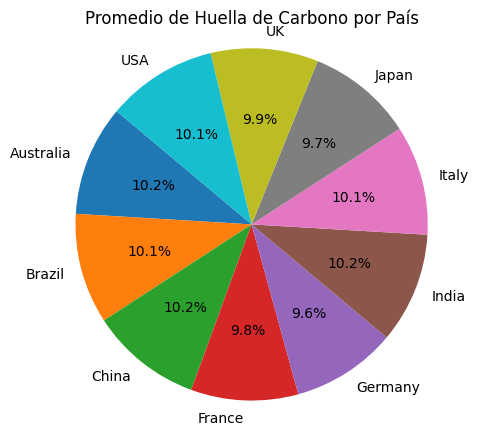

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(promedio_carbono_por_pais,
        labels=promedio_carbono_por_pais.index,
        autopct='%1.1f%%', #formateo el porcentaje que se mostrará en cada porción (un decimal seguido del símbolo de porcentaje)
        startangle=140)

plt.title('Promedio de Huella de Carbono por País')
plt.axis('equal')  #Aseguro que la tarta sea un círculo.
plt.savefig("../images/practicas_sostenibles_años.jpg")

📊 **Gráfica: Promedio de Uso de agua por País**

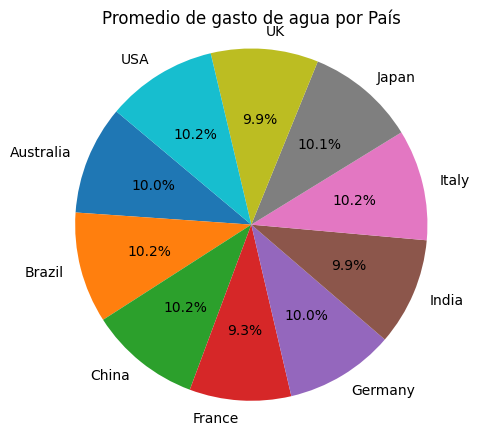

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(promedio_agua_por_pais,
        labels=promedio_agua_por_pais.index,
        autopct='%1.1f%%', #formateo el porcentaje que se mostrará en cada porción (un decimal seguido del símbolo de porcentaje)
        startangle=140)

plt.title('Promedio de gasto de agua por País')
plt.axis('equal')  #Aseguro que la tarta sea un círculo.
plt.savefig("../images/practicas_sostenibles_agua_años.jpg")

📊 **Gráfica: Promedio de Producción de Desperdicios por País**

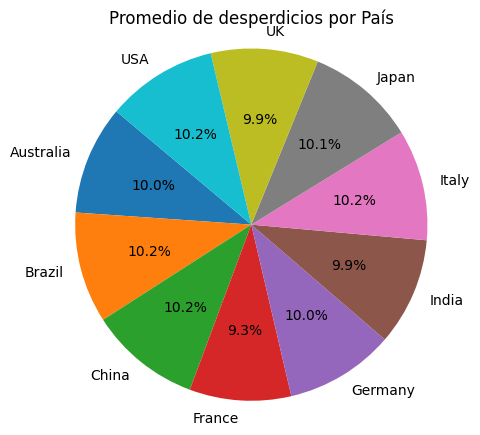

In [166]:
plt.figure(figsize=(5, 5))
plt.pie(promedio_desperdicios_por_pais,
        labels=promedio_desperdicios_por_pais.index,
        autopct='%1.1f%%', #formateo el porcentaje que se mostrará en cada porción (un decimal seguido del símbolo de porcentaje)
        startangle=140)

plt.title('Promedio de desperdicios por País')
plt.axis('equal')  #Aseguro que la tarta sea un círculo.
plt.savefig("../images/practicas_sostenibles_waste_años.jpg")

✏️**Conclusión**

**Tendencia General Huella de Carbono:**

Los promedios de huella de carbono entre los países mostrados no varían drásticamente. Se encuentran en un rango relativamente estrecho, aproximadamente entre 241 y 256 unidades de medida (MT). Esto sugiere que, en promedio, las marcas de estos países tienen una huella de carbono similar.

*Países con Mayor Huella de Carbono Promedio:*

China (256.50): Presenta el promedio de huella de carbono ligeramente más alto entre los países analizados. Esto podría ser atribuible a diversos factores como la estructura industrial, las fuentes de energía utilizadas en la producción y las regulaciones ambientales.
India (254.29) y Australia (254.08): Le siguen de cerca con promedios también elevados.

*Países con Menor Huella de Carbono Promedio:*

Alemania (241.07): Muestra el promedio de huella de carbono más bajo. Esto podría indicar una mayor eficiencia en los procesos de producción, una mayor dependencia de fuentes de energía más limpias o regulaciones ambientales más estrictas.
Japón (243.69) y Francia (246.43): También se encuentran en el extremo inferior del rango, sugiriendo una menor huella de carbono promedio en comparación con otros países de la lista. El caso de Francia podría estar relacionado con su significativa dependencia de la energía nuclear, que tiene bajas emisiones directas de carbono durante la generación.

*Países Intermedios:*

Brasil, Italia, Reino Unido y Estados Unidos tienen promedios que se sitúan en un punto intermedio, sin destacar particularmente por ser los más altos o los más bajos.

👖*Implicaciones para la Hipótesis:*

**Los datos parecen respaldar la primera parte de tu hipótesis: "La huella de carbono promedio de los productos varía significativamente entre países." Aunque la variación no es enorme, sí existen diferencias notables entre el país con el promedio más alto (China) y el país con el promedio más bajo (Alemania).**

**Tendencia General del Uso del Agua:**

Los promedios de uso de agua por país se encuentran en un rango relativamente estrecho, generalmente entre los 2.45 x 10^6 y los 2.63 x 10^6 litros. Esto sugiere que, en promedio, las marcas de estos países tienen un consumo de agua bastante similar en sus procesos de producción.

*Países con Mayor Promedio de Gasto de Agua:*

Reino Unido (2.627808e+06 litros): Presenta el promedio de gasto de agua ligeramente más alto entre los países analizados. Esto podría deberse a los tipos de industrias predominantes en el Reino Unido, la eficiencia de sus procesos productivos o las regulaciones relacionadas con el uso del agua.
Japón (2.581787e+06 litros): Le sigue con un promedio de gasto de agua también relativamente alto.

*Países con Menor Promedio de Gasto de Agua:*

Estados Unidos (2.450122e+06 litros): Muestra el promedio de gasto de agua más bajo de este conjunto de países.
Francia (2.468738e+06 litros) e Italia (2.477190e+06 litros): También se encuentran en el extremo inferior del rango, indicando un menor consumo promedio de agua en comparación con otros países de la lista.

*Países con Promedios Intermedios:*

Australia, Brasil, China, Alemania e India tienen promedios de gasto de agua que se sitúan en un punto medio del rango observado.

👖*Implicaciones para la Hipótesis:*

**Los datos parecen respaldar la segunda parte de tu hipótesis: "El uso de agua promedio de los productos varía significativamente entre países." Aunque la variación no es enorme, sí existen diferencias notables entre el país con el promedio más alto (Reino Unido) y el país con el promedio más bajo (Estados Unidos).**

**Tendencia General de la Producción de Desperdicios:**

Rango de promedios: Los promedios de producción de desperdicios entre los países mostrados varían, aunque no de forma drástica. El valor más bajo lo tiene Francia (46725.04 KG) y el más alto China (51312.21 KG). La diferencia entre el valor más bajo y el más alto es de aproximadamente 4587 KG.

*Países con mayor promedio:* 

China presenta el promedio de producción de desperdicios más alto. Brasil, Italia y Estados Unidos también tienen promedios relativamente altos, cercanos a los 51000 KG.

*Países con menor promedio:*

Francia destaca con el promedio de producción de desperdicios más bajo entre los países listados. El Reino Unido también se encuentra en el extremo inferior del rango.

*Países en un rango intermedio: *

Australia, Alemania, India y Japón se sitúan en un rango intermedio de promedios de producción de desperdicios, entre los 49000 y los 50500 KG.

👖*Implicaciones para la Hipótesis:*

**Los datos parecen respaldar la segunda parte de tu hipótesis: "El uso de agua promedio de los productos varía significativamente entre países." Aunque la variación no es enorme, sí existen diferencias notables entre el país con el promedio más alto (China) y el país con el promedio más bajo (Francia).**

💧🗑️👣**Otras interpretaciones y consideraciones:**

Una vez interpretada cada métrica ambiental por separado, podemos ver que exceptuando a China que coincide como el país con mayor huella de cabono y mayor productor de residuos, el resto de países no relaciona ninguna de las 3 métricas entre sí, es decir, que no va unido el ser el mayor país de uso de agua con serlo también en huella de carbono ni producción de desperdicios, ni a la inversa.

------------------

### 🏷️**HIPÓTESIS 6:** *"Hay correlación significativamente entre la huella de carbono, el uso de agua y de la producción de residuos entre países"*

🔎**Análisis: Calculo el promedio de las métricas de impacto ambiental por país**

In [167]:
promedio_impacto_por_pais = df1.groupby('Country')[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG']].mean()

🔎**Análisis: Calculo la matriz de correlación entre las métricas a nivel de país**

In [168]:
matriz_correlacion_pais = promedio_impacto_por_pais.corr(method='pearson')

📊 **Gráfica: Matriz de correlación entre las métricas a nivel de país**

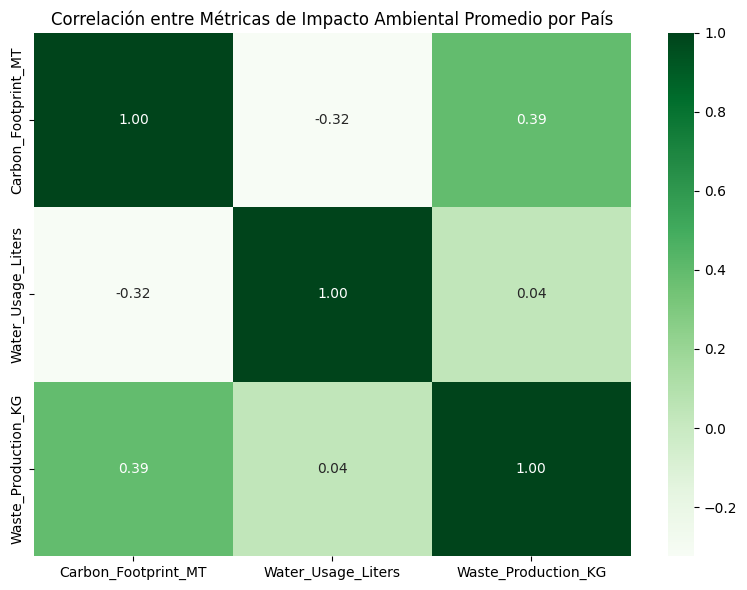

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion_pais, annot=True, cmap="Greens", fmt=".2f")
plt.title('Correlación entre Métricas de Impacto Ambiental Promedio por País')
plt.tight_layout()
plt.savefig("../images/practicas_sostenibles_waste_años.jpg")

🔎**Análisis: Analizo de correlación específica entre dos métricas**

In [169]:
correlacion_carbono_agua = promedio_impacto_por_pais['Carbon_Footprint_MT'].corr(promedio_impacto_por_pais['Water_Usage_Liters'], method='pearson')
correlacion_carbono_residuos = promedio_impacto_por_pais['Carbon_Footprint_MT'].corr(promedio_impacto_por_pais['Waste_Production_KG'], method='pearson')
correlacion_agua_residuos = promedio_impacto_por_pais['Water_Usage_Liters'].corr(promedio_impacto_por_pais['Waste_Production_KG'], method='pearson')

📊 **Gráfica: Correlación entre Promedio de Huella de Carbono y Promedio de Uso de Agua por País**

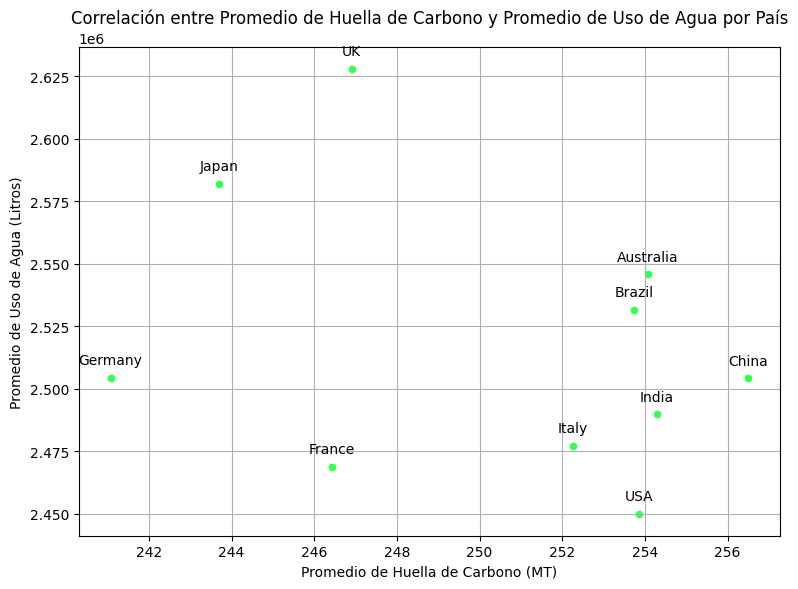

In [170]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Carbon_Footprint_MT', y='Water_Usage_Liters', data=promedio_impacto_por_pais, color="#33ff4f")
for i, row in promedio_impacto_por_pais.iterrows():
    plt.annotate(i, (row['Carbon_Footprint_MT'], row['Water_Usage_Liters']), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Correlación entre Promedio de Huella de Carbono y Promedio de Uso de Agua por País')
plt.xlabel('Promedio de Huella de Carbono (MT)')
plt.ylabel('Promedio de Uso de Agua (Litros)')
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/carbono_water.jpg")

📊 **Gráfica: Correlación entre Promedio de Huella de Carbono y Promedio de Producción de Residuos por País**

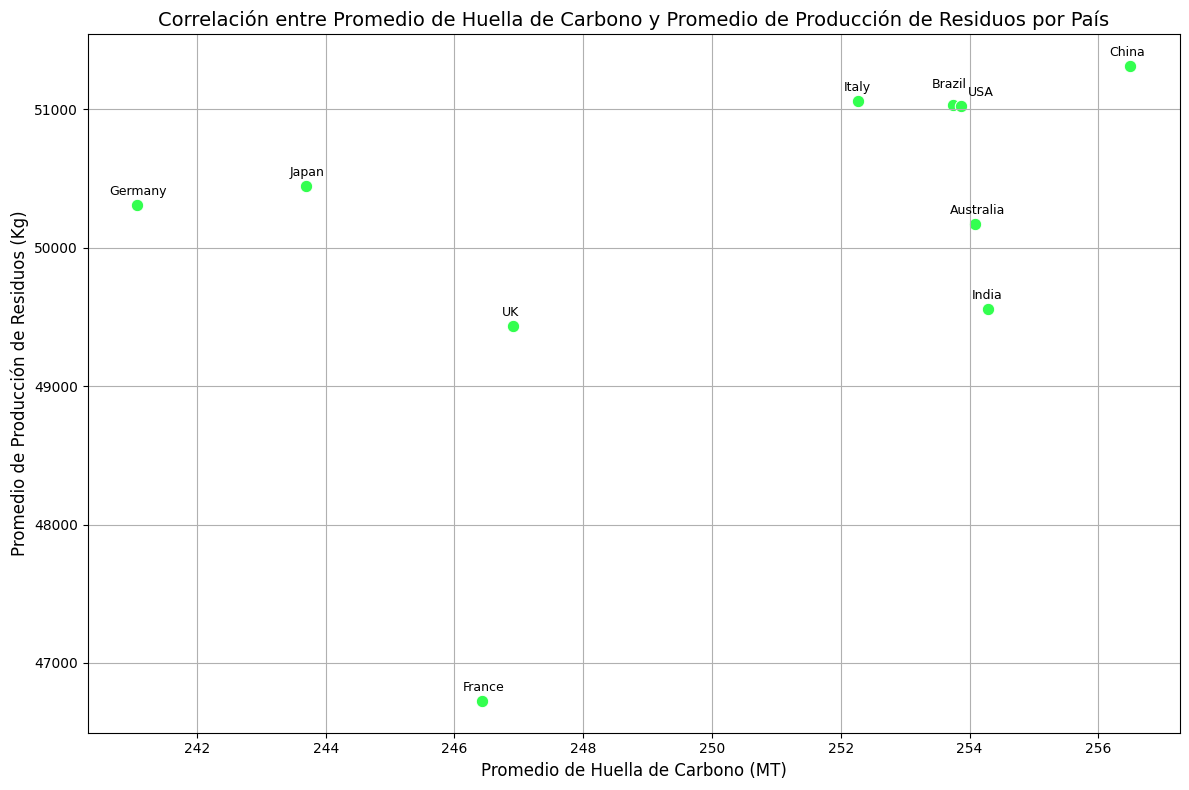

In [171]:
plt.figure(figsize=(12, 8)) #Un poco más grande para dar espacio porque coincidian países en el mismo punto y no se podían leer
sns.scatterplot(x='Carbon_Footprint_MT', y='Waste_Production_KG', data=promedio_impacto_por_pais, color="#33ff4f", s=80) #Aumento un poco el tamaño de los puntos

for i, row in promedio_impacto_por_pais.iterrows():
    x_offset = 5  #Desplazamiento horizontal inicial
    y_offset = 5  #Desplazamiento vertical inicial

    #Ajustes específicos para evitar superposiciones observadas en la imagen
    if i == 'Japan':
        x_offset = -12
        y_offset = 5
    elif i == 'Italy':
        x_offset = -10
        y_offset = 5
    elif i == 'Brazil':
        x_offset = -15
        y_offset = 10
    elif i == 'Australia':
        x_offset = -18
        y_offset = 5
    elif i == 'India':
        x_offset = -12
        y_offset = 5
    elif i == 'China':
        x_offset = -15
        y_offset = 5
    elif i == 'UK':
        x_offset = -8
        y_offset = 5
    elif i == 'France':
        x_offset = -14
        y_offset = 5
    elif i == 'Germany':
        x_offset = -20
        


    plt.annotate(i, (row['Carbon_Footprint_MT'], row['Waste_Production_KG']),
                 textcoords="offset points",
                 xytext=(x_offset, y_offset),
                 ha='left', va='bottom', fontsize=9)

plt.title('Correlación entre Promedio de Huella de Carbono y Promedio de Producción de Residuos por País', fontsize=14)
plt.xlabel('Promedio de Huella de Carbono (MT)', fontsize=12)
plt.ylabel('Promedio de Producción de Residuos (Kg)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/carbono_waste.jpg")

📊 **Gráfica: Correlación entre Promedio de Uso de Agua y Promedio de Producción de Residuos por País**

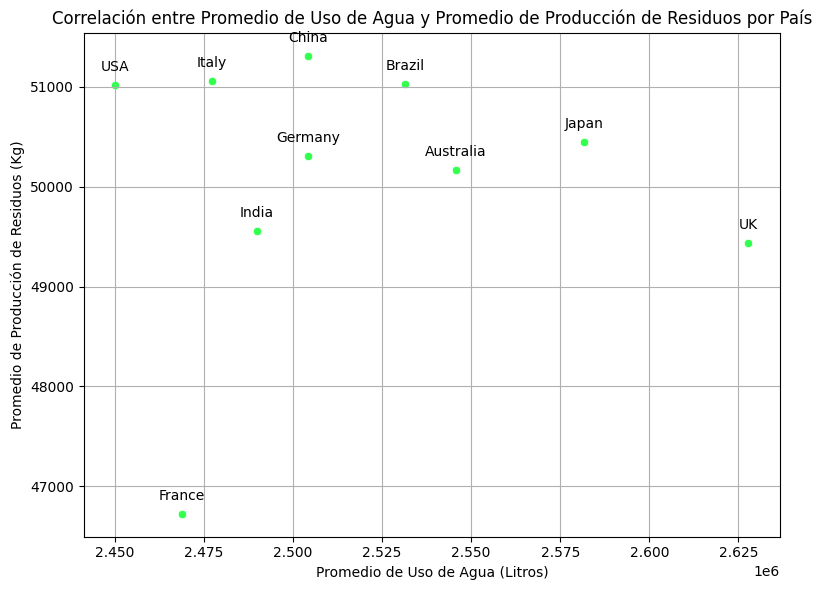

In [173]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Water_Usage_Liters', y='Waste_Production_KG', data=promedio_impacto_por_pais, color="#33ff4f")
for i, row in promedio_impacto_por_pais.iterrows():
    plt.annotate(i, (row['Water_Usage_Liters'], row['Waste_Production_KG']), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Correlación entre Promedio de Uso de Agua y Promedio de Producción de Residuos por País')
plt.xlabel('Promedio de Uso de Agua (Litros)')
plt.ylabel('Promedio de Producción de Residuos (Kg)')
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/water_waste.jpg")

✏️**Conclusión**

**Análisis de la Matriz de Correlación entre Métricas de Impacto Ambiental a Nivel de País:**

*Correlación entre Huella de Carbono y Uso de Agua*: El valor de -0.32 indica una correlación negativa débil. Esto sugiere que, en promedio a nivel de país, puede haber una ligera tendencia a que los países con una mayor huella de carbono promedio tiendan a tener un menor uso de agua promedio, y viceversa. Sin embargo, la correlación es bastante débil, por lo que esta relación no es muy fuerte ni consistente.

*Correlación entre Huella de Carbono y Producción de Residuos*: El valor de 0.39 indica una correlación positiva moderada. Esto sugiere que, en promedio a nivel de país, existe una tendencia a que los países con una mayor huella de carbono promedio también tiendan a tener una mayor producción de residuos promedio. Esta relación es más fuerte que la anterior.

*Correlación entre Uso de Agua y Producción de Residuos*: El valor de 0.04 indica una correlación positiva muy débil, prácticamente nula. Esto sugiere que no hay una relación lineal significativa entre el promedio de uso de agua y el promedio de producción de residuos a nivel de país.

👖*Conclusiones:*

A nivel de país (promediando los datos de las marcas dentro de cada país), existen algunas relaciones débiles a moderadas entre las diferentes métricas de impacto ambiental.
La huella de carbono muestra una correlación positiva moderada con la producción de residuos, lo que podría sugerir que procesos o industrias que generan más emisiones de carbono también tienden a generar más residuos.
La relación entre la huella de carbono y el uso de agua es negativa y débil, lo que indica una ligera tendencia opuesta, pero no una regla fuerte.
El uso de agua y la producción de residuos parecen ser prácticamente independientes a nivel de país, ya que su correlación es muy cercana a cero.

*Implicaciones para la Hipótesis de Correlación:*

**La hipótesis 6 de que existe una correlación entre diferentes métricas de impacto ambiental a nivel de país se ve parcialmente respaldada. Se encontró una correlación moderada entre la huella de carbono y la producción de residuos, pero las correlaciones con el uso de agua fueron débiles o nulas.**

----------------------

### 🏷️**HIPÓTESIS 7:** *"La 'Market_Trend' de los productos podría variar según el país."*

🔎**Análisis: Agrupo los datos por país y analizo la distribución de 'Market_Trend'**

In [174]:
tendencia_por_pais = df1.groupby('Country')['Market_Trend'].value_counts()

🔎**Análisis: Calculo los porcentajes de cada tendencia por país**

In [175]:
tendencia_por_pais_porcentaje = df1.groupby('Country')['Market_Trend'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

📊 **Gráfica: Proporción de cada tendencia dentro de cada país**

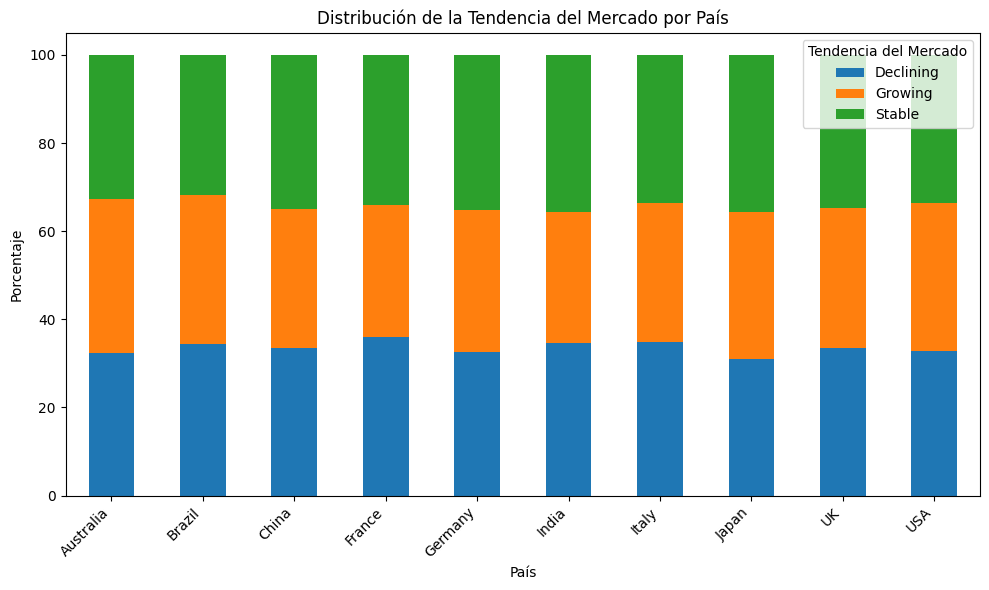

In [176]:
tendencia_por_pais_porcentaje.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de la Tendencia del Mercado por País')
plt.xlabel('País')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tendencia del Mercado')
plt.tight_layout()
plt.savefig("../images/market_trend_por_pais.jpg")

📊 **Gráfica: Proporción de cada tendencia dentro de cada país con barras agrupadas**

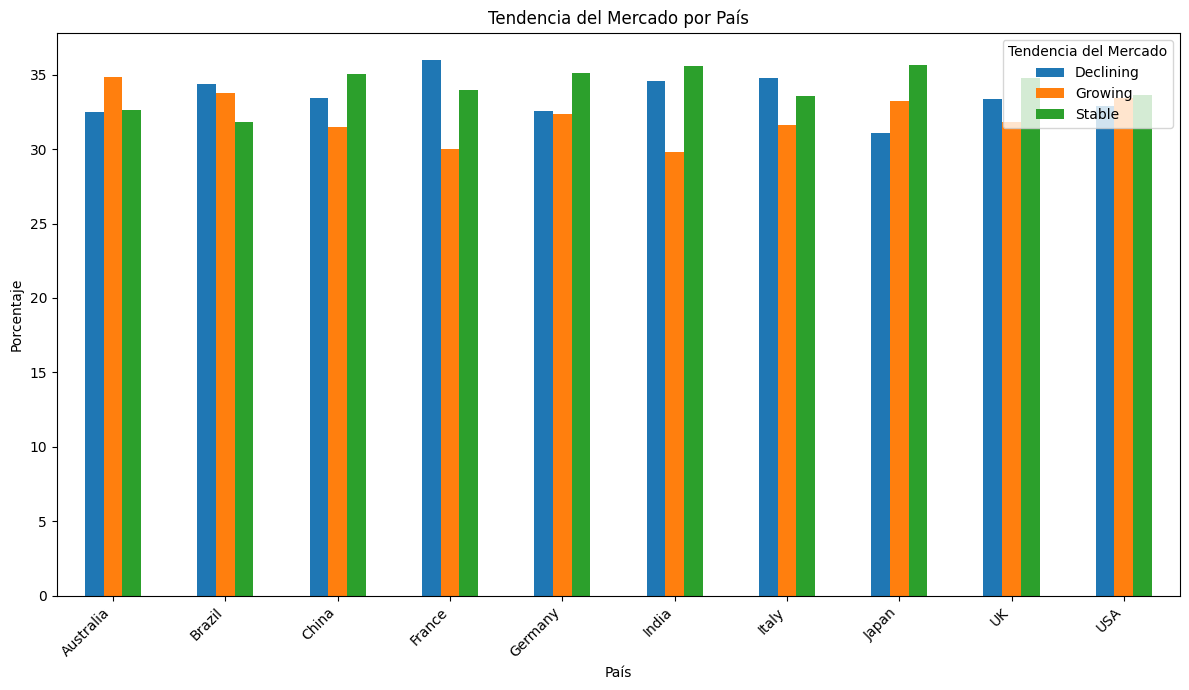

In [177]:
tendencia_por_pais_porcentaje.plot(kind='bar', figsize=(12, 7))
plt.title('Tendencia del Mercado por País')
plt.xlabel('País')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tendencia del Mercado')
plt.tight_layout()
plt.savefig("../images/market_trend_por_pais_agrupadas.jpg")

🔎**Análisis: Calculo los porcentajes de cada tendencia por país y durante un periodo de tiempo**

In [178]:
tendencia_por_pais_anio_porcentaje = df.groupby(['Country', 'Year'])['Market_Trend'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

📊 **Gráfica: Proporción de cada tendencia dentro de cada país y durante un periodo de tiempo**

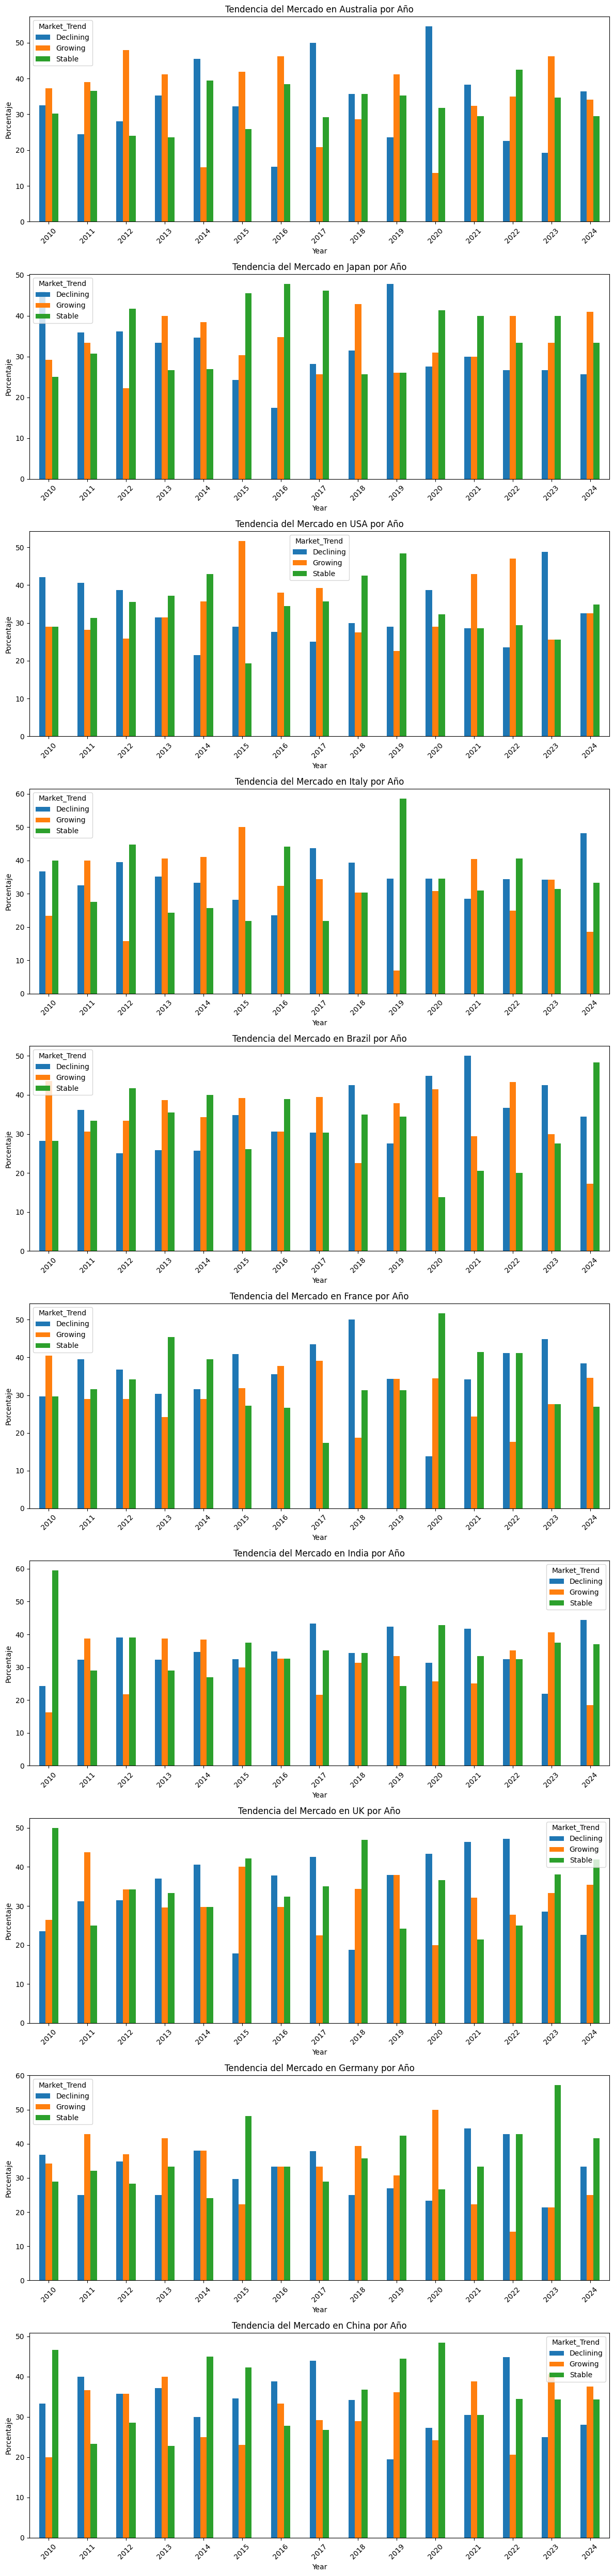

In [179]:
paises_unicos = df1['Country'].unique()
num_paises = len(paises_unicos)
num_anios = df1['Year'].nunique()
tendencias_unicas = df1['Market_Trend'].unique()

fig, axes = plt.subplots(nrows=num_paises, ncols=1, figsize=(12, 5 * num_paises))

for i, pais in enumerate(paises_unicos):
    datos_pais = tendencia_por_pais_anio_porcentaje.loc[pais]
    datos_pais.plot(kind='bar', ax=axes[i], legend=True)
    axes[i].set_title(f'Tendencia del Mercado en {pais} por Año')
    axes[i].set_ylabel('Porcentaje')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("../images/market_trend_por_pais_año.jpg")

✏️**Conclusión**

**Análisis de la Distribución de la Tendencia del Mercado por País (Conteo):**

Este primer resultado muestra el número absoluto de productos que caen en cada categoría de 'Market_Trend' ('Growing', 'Stable', 'Declining') para cada país.

*Australia*: Tiene una distribución bastante equilibrada entre las tres tendencias, con un ligero predominio de 'Growing'.
*Brasil*: Muestra una mayor cantidad de productos en tendencia 'Declining', seguido de 'Growing' y luego 'Stable'.
*China*: Tiene la mayor cantidad de productos en tendencia 'Stable', seguido de 'Declining' y luego 'Growing'.
*Francia*: Similar a Brasil, tiene la mayor cantidad de productos en tendencia 'Declining', seguida de 'Stable' y luego 'Growing'.
*Alemania*: Presenta la mayor cantidad de productos en tendencia 'Stable', seguido de 'Declining' y luego 'Growing'.
*India*: Al igual que Alemania y China, tiene la mayor cantidad de productos en tendencia 'Stable', seguida de 'Declining' y luego 'Growing'.
*Italia*: Muestra una mayor cantidad de productos en tendencia 'Declining', seguido de 'Stable' y luego 'Growing'.
*Japón*: Tiene la mayor cantidad de productos en tendencia 'Stable', seguido de 'Growing' y luego una cantidad menor en 'Declining'.
*Reino Unido*: Presenta la mayor cantidad de productos en tendencia 'Stable', seguido de 'Declining' y luego 'Growing'.
*Estados Unidos*: Tiene una distribución bastante uniforme entre las tres tendencias, con una ligera ventaja para 'Stable'.

**Análisis del Porcentaje de la Tendencia del Mercado por País:**

Este segundo resultado normaliza los conteos anteriores para mostrar el porcentaje de cada tendencia dentro de cada país, lo que facilita la comparación entre países independientemente del número total de productos observados en cada uno.

*Australia*: Los porcentajes son muy cercanos, indicando una distribución bastante homogénea de las tendencias.
*Brasil*: Un mayor porcentaje de productos se encuentra en tendencia 'Declining' (34.4%), con porcentajes ligeramente menores para 'Growing' (33.8%) y 'Stable' (31.8%).
*China*: Un porcentaje notablemente mayor de productos se clasifica como 'Stable' (35.1%), con porcentajes similares para 'Declining' (33.5%) y 'Growing' (31.5%).
*Francia*: Al igual que Brasil, 'Declining' tiene el porcentaje más alto (36.0%), seguido de 'Stable' (34.0%) y luego 'Growing' (30.0%).
*Alemania*: 'Stable' tiene el porcentaje más alto (35.1%), con porcentajes similares para 'Declining' (32.5%) y 'Growing' (32.3%).
*India*: 'Stable' tiene el porcentaje más alto (35.6%), seguido de 'Declining' (34.6%) y luego 'Growing' (29.8%).
*Italia*: 'Declining' tiene el porcentaje más alto (34.8%), seguido de 'Stable' (33.6%) y luego 'Growing' (31.6%).
*Japan*: 'Stable' tiene el porcentaje más alto (35.6%), con porcentajes similares para 'Growing' (33.3%) y luego 'Declining' (31.1%).
*Reino Unido*: 'Stable' tiene el porcentaje más alto (34.8%), seguido de 'Declining' (33.4%) y luego 'Growing' (31.8%).
*Estados Unidos*: Los porcentajes son muy cercanos, similar a Australia, indicando una distribución bastante equilibrada de las tendencias.

👖*Implicaciones para la Hipótesis:*

**En resumen, existe una variación notable en la distribución de las tendencias del mercado entre los diferentes países. Algunos países muestran una mayor proporción de productos en tendencia 'Declining' (como Brasil y Francia), mientras que otros tienen una mayor proporción en tendencia 'Stable' (como China, Alemania, India, Japón y el Reino Unido). Australia y Estados Unidos parecen tener una distribución más uniforme, por lo que se cumple la hipótesis 7.**

*Tendencia dominante*: La tendencia 'Stable' parece ser la más común en varios de los países analizados (China, Alemania, India, Japón, Reino Unido, y con una presencia fuerte en Australia y Estados Unidos). Sin embargo, en Brasil y Francia, la tendencia 'Declining' tiene una mayor representación.

--------------------

### 🏷️**HIPÓTESIS 8:** *"El nivel de sostenibilidad, inferido de la 'Sustainability_Rating', varía significativamente entre los diferentes países."*

🔎**Análisis: Cuento la frecuencia de cada 'Sustainability_Rating' por país**

In [180]:
conteo_sostenibilidad_por_pais = df1.groupby('Country')['Sustainability_Rating'].value_counts().unstack(fill_value=0)

🔎**Análisis: Calculo el porcentaje de cada 'Sustainability_Rating' por país**

In [181]:
porcentaje_sostenibilidad_por_pais = df1.groupby('Country')['Sustainability_Rating'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

📊 **Gráfica: Distribución Porcentual de la Calificación de Sostenibilidad por País**

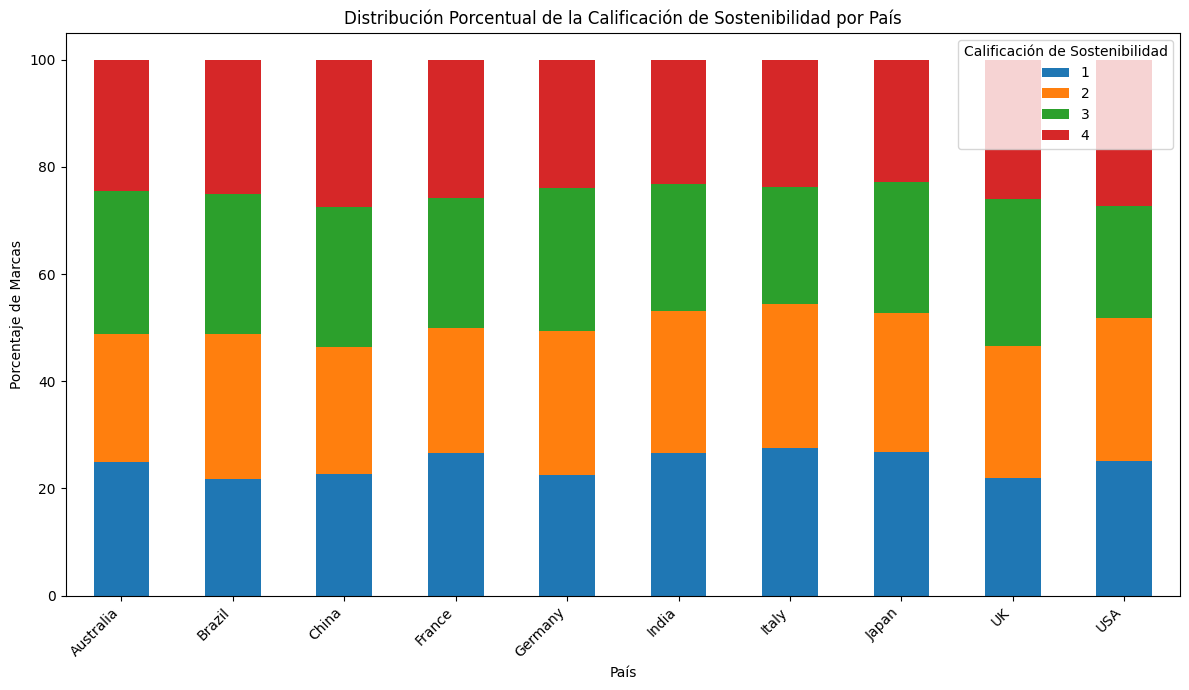

In [182]:
porcentaje_sostenibilidad_por_pais.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribución Porcentual de la Calificación de Sostenibilidad por País')
plt.xlabel('País')
plt.ylabel('Porcentaje de Marcas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Calificación de Sostenibilidad')
plt.tight_layout()
plt.savefig("../images/sostenibilidad_pais.jpg")

📊 **Gráfica: Distribución Porcentual de la Calificación de Sostenibilidad por País (conteo)**

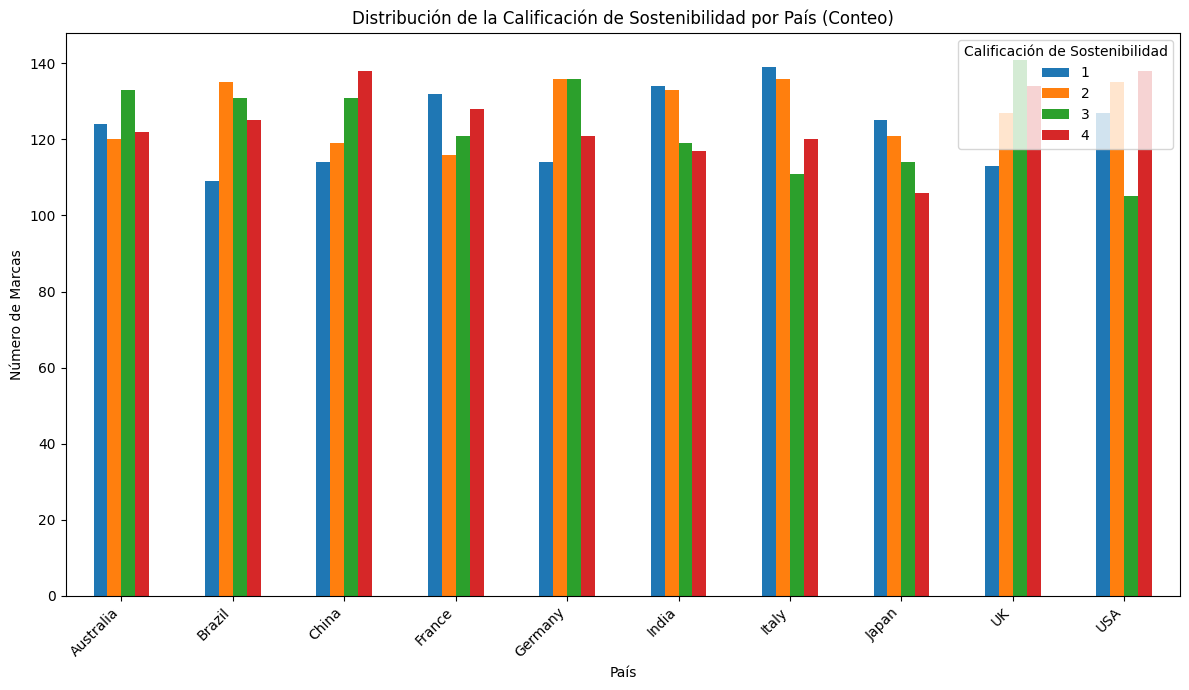

In [183]:
conteo_sostenibilidad_por_pais.plot(kind='bar', figsize=(12, 7))
plt.title('Distribución de la Calificación de Sostenibilidad por País (Conteo)')
plt.xlabel('País')
plt.ylabel('Número de Marcas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Calificación de Sostenibilidad')
plt.tight_layout()
plt.savefig("../images/sostenibilidad_pais_agrupadas.jpg")

📊 **Gráfica: Huella de Carbono por País y Calificación de Sostenibilidad**

C:\Users\yoai\AppData\Local\Temp\ipykernel_18792\2476928403.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#d2d5d3'` for the same effect.

  sns.boxplot(x='Country', y='Carbon_Footprint_MT', hue='Sustainability_Rating', data=df1, color='#d2d5d3');


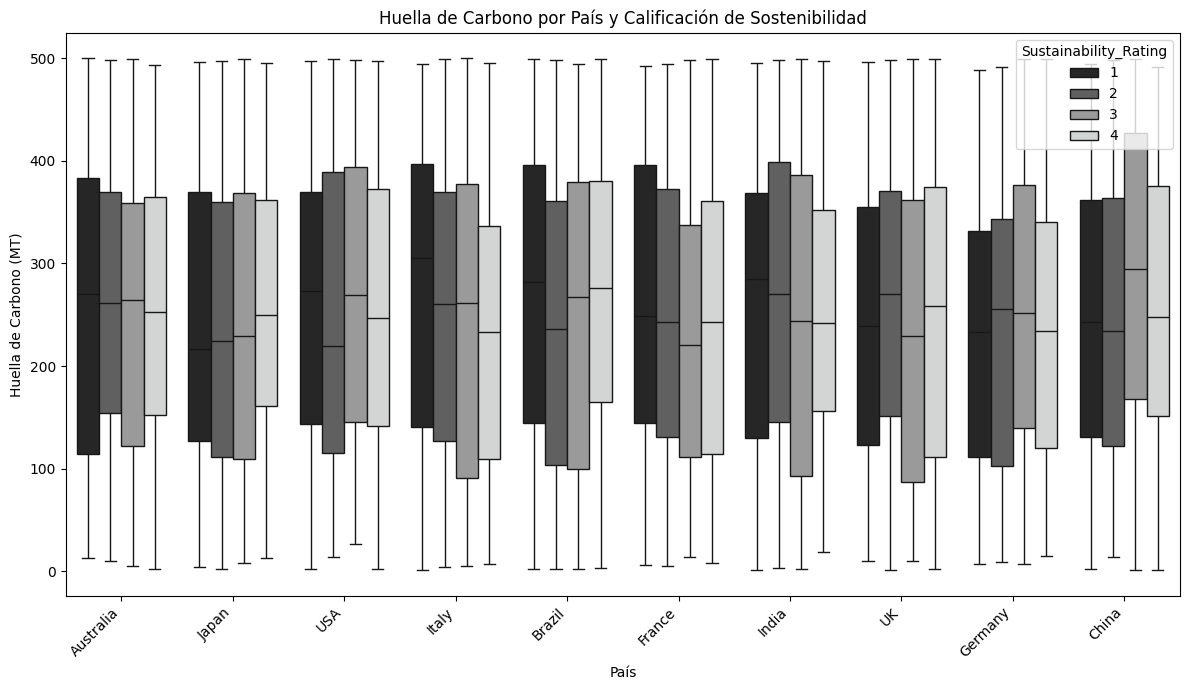

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y='Carbon_Footprint_MT', hue='Sustainability_Rating', data=df1, color='#d2d5d3')
plt.title('Huella de Carbono por País y Calificación de Sostenibilidad')
plt.xlabel('País')
plt.ylabel('Huella de Carbono (MT)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Sustainability_Rating', loc='upper right')
plt.savefig("../images/sostenibilidad_pais_carbon.jpg")

📊 **Gráfica: Uso de agua por País y Calificación de Sostenibilidad**

C:\Users\yoai\AppData\Local\Temp\ipykernel_18792\3257986124.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#78f5d3'` for the same effect.

  sns.boxplot(x='Country', y="Water_Usage_Liters", hue='Sustainability_Rating', data=df1, color= "#78f5d3")


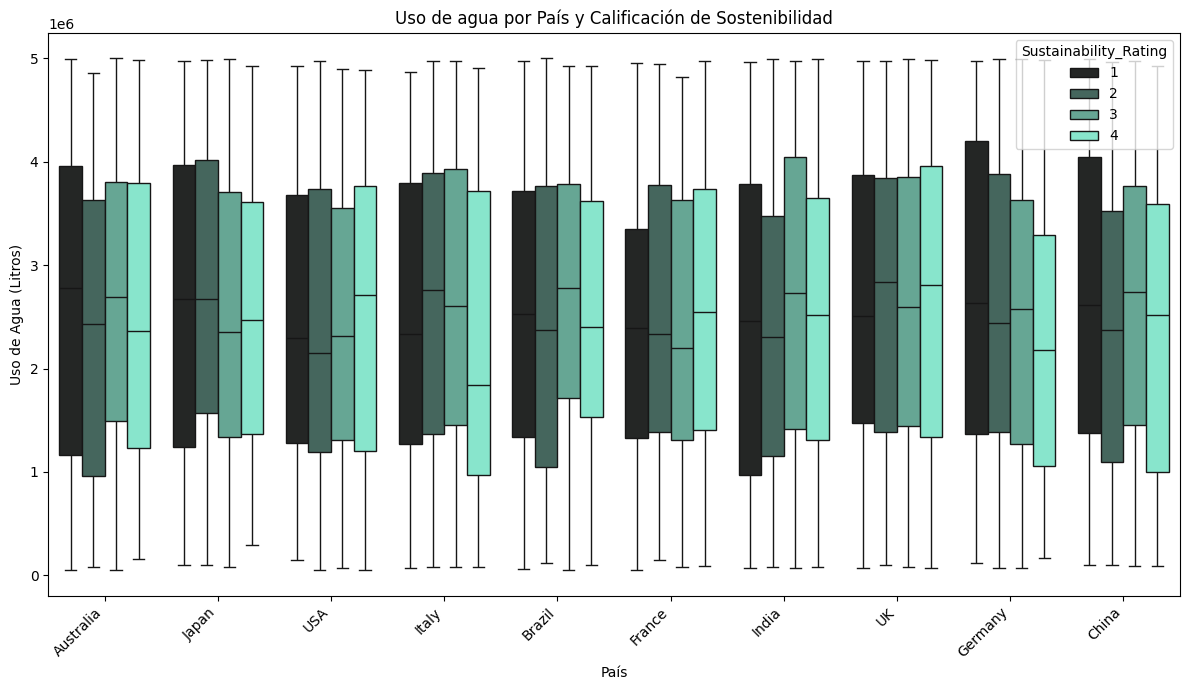

In [188]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y="Water_Usage_Liters", hue='Sustainability_Rating', data=df1, color= "#78f5d3")
plt.title('Uso de agua por País y Calificación de Sostenibilidad')
plt.xlabel('País')
plt.ylabel('Uso de Agua (Litros)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Sustainability_Rating', loc='upper right')
plt.savefig("../images/sostenibilidad_pais_carbon.jpg")

📊 **Gráfica: Producción de Residuos y Calificación de Sostenibilidad**

C:\Users\yoai\AppData\Local\Temp\ipykernel_18792\3408542125.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#c87607'` for the same effect.

  sns.boxplot(x='Country', y="Waste_Production_KG", hue='Sustainability_Rating', data=df, color= "#c87607")


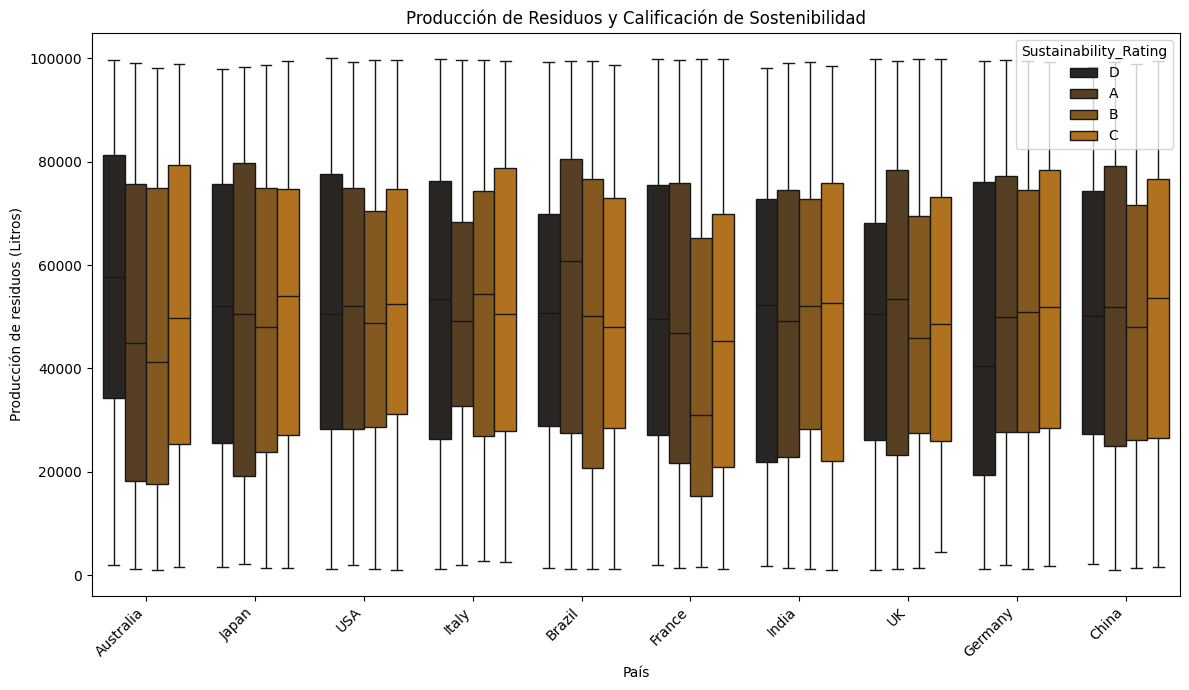

In [189]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y="Waste_Production_KG", hue='Sustainability_Rating', data=df, color= "#c87607")
plt.title('Producción de Residuos y Calificación de Sostenibilidad')
plt.xlabel('País')
plt.ylabel('Producción de residuos (Litros)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Sustainability_Rating', loc='upper right')
plt.savefig("../images/sostenibilidad_pais_residuos.jpg")

🔎**Análisis: Calculo de la calificación de sostenibilidad más alta por país**

In [190]:
calificacion_mas_alta = 1
marcas_alta_calificacion = df1[df1['Sustainability_Rating'] == calificacion_mas_alta].groupby('Country').size()
total_marcas_por_pais = df1['Country'].value_counts()
porcentaje_alta_calificacion = (marcas_alta_calificacion / total_marcas_por_pais * 100).fillna(0).sort_values(ascending=False)

📊 **Gráfica: Calificación de sostenibilidad más alta por país**

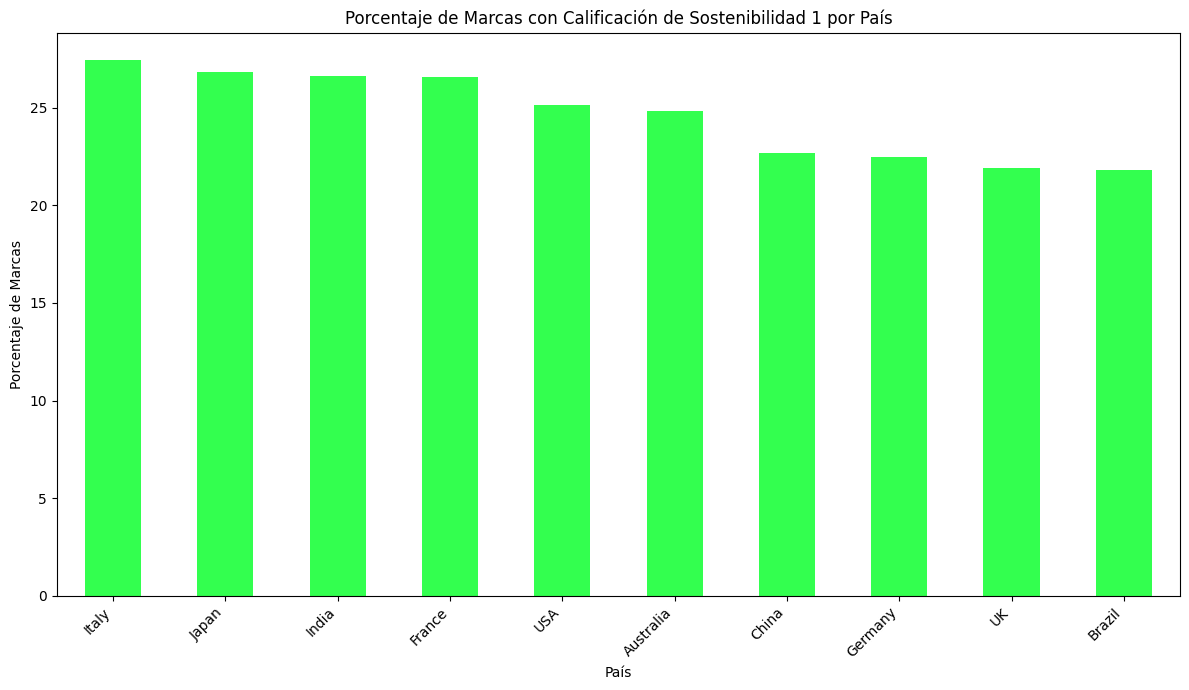

In [191]:
plt.figure(figsize=(12, 7))
porcentaje_alta_calificacion.plot(kind='bar', color="#33ff4f")
plt.title(f'Porcentaje de Marcas con Calificación de Sostenibilidad {calificacion_mas_alta} por País')
plt.xlabel('País')
plt.ylabel('Porcentaje de Marcas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"../images/porcentaje_calificacion_mas_alta.jpg")

🔎**Análisis: Calculo de la calificación de sostenibilidad más baja por país**

In [192]:
calificacion_mas_baja = 4
marcas_alta_calificacion = df1[df1['Sustainability_Rating'] == calificacion_mas_baja].groupby('Country').size()
total_marcas_por_pais = df1['Country'].value_counts()
porcentaje_alta_calificacion = (marcas_alta_calificacion / total_marcas_por_pais * 100).fillna(0).sort_values(ascending=False)

📊 **Gráfica: Calificación de sostenibilidad más baja por país**

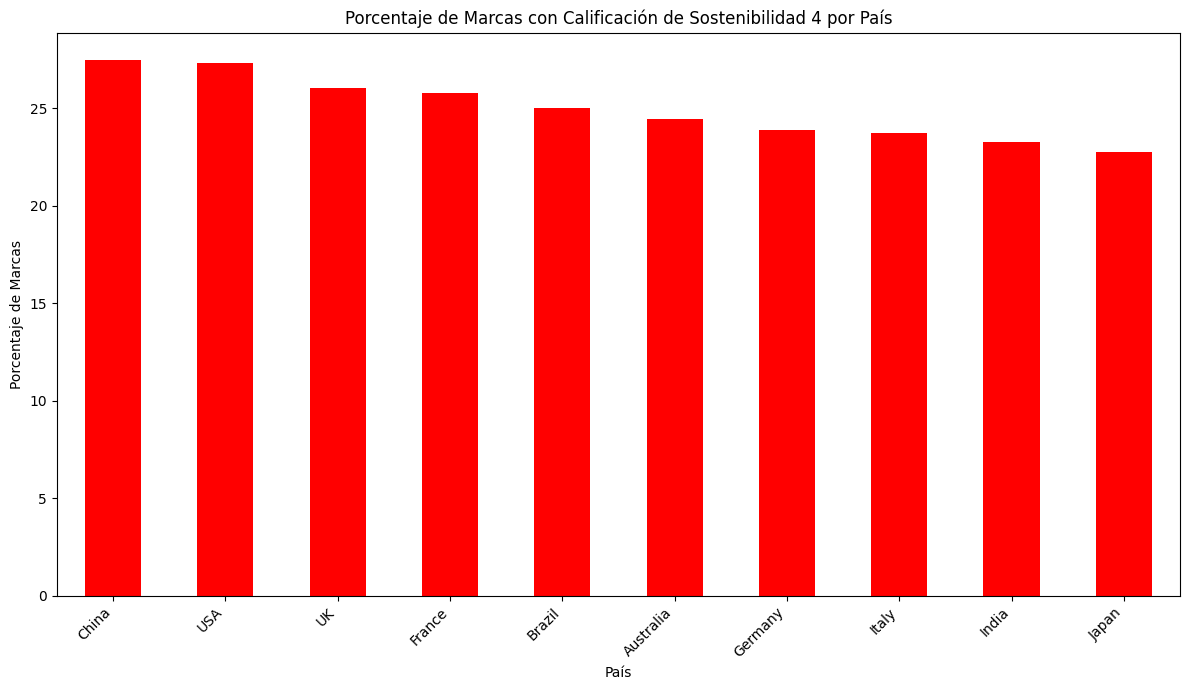

In [193]:
plt.figure(figsize=(12, 7))
porcentaje_alta_calificacion.plot(kind='bar', color='red')  # Puedes cambiar el color si lo deseas
plt.title(f'Porcentaje de Marcas con Calificación de Sostenibilidad {calificacion_mas_baja} por País')
plt.xlabel('País')
plt.ylabel('Porcentaje de Marcas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"../images/porcentaje_calificacion_mas_baja.jpg")

✏️**Conclusión**

**Análisis del nivel de Sostenibilidad por países:**

En la mayoría de los países, la distribución de las calificaciones entre 1 (Excelente) y 4 (Correcto) parece relativamente uniforme, con conteos que generalmente oscilan entre 100 y 140 marcas por calificación. Esto sugiere que no hay una concentración extrema en una única calificación de sostenibilidad a nivel global.

*Variaciones por País:*

*Italia*: Muestra un conteo ligeramente mayor de marcas con la calificación 1 (Excelente) (139) en comparación con otras calificaciones.
*Reino Unido*: Tiene un conteo más alto de marcas con la calificación 3 (Bueno) (141) en comparación con las otras calificaciones.
*Japón*: Presenta un conteo ligeramente menor de marcas con la calificación 4 (Correcto) (106) en comparación con las otras.
*Estados Unidos*: Tiene un conteo relativamente bajo de marcas con la calificación 3 (Bueno) (105) en comparación con las otras.

*Similitudes*: Australia, Brasil, China, Francia y Alemania muestran una distribución bastante pareja entre las cuatro calificaciones en términos de conteo absoluto. India también sigue esta tendencia, aunque con una ligera inclinación hacia las calificaciones 1 (Excelente) y 2 (Muy buena).

*Análisis del Porcentaje:*

El análisis del porcentaje normaliza los conteos por el total de marcas en cada país, lo que permite una comparación más directa de la proporción de cada calificación dentro de cada mercado.

*Porcentajes más altos*:

*Italia*: Tiene el porcentaje más alto de marcas con la calificación 1 (Excelente) (27.47%).
*India*: Le sigue con un 26.64% de marcas con la calificación 1 (excelente).
*Francia*: También presenta un porcentaje considerable de marcas con la calificación 1 (Excelente) (26.56%).
*Japón*: Tiene un 26.82% de marcas con la calificación 1 (Excelente).

*Porcentajes más bajos*:

*China y Estados Unidos*: Tienen los porcentajes más bajos de marcas con la calificación 4 (Correcto) (27.49% y 27.33% respectivamente).
*Reino Unido*: También presenta un alto porcentaje de marcas con la calificación 4 (Correcto) (26.02%).

*Distribuciones Relativamente Equilibradas*: Países como Australia, Brasil y Alemania muestran una distribución de porcentajes más uniforme entre las cuatro calificaciones, sin una clara dominancia de una sola.

👖*Implicaciones para la Hipótesis:*

**En resumen, no hay una tendencia global fuerte hacia una única calificación de sostenibilidad. La distribución de las calificaciones varía significativamente entre países.
Algunos países muestran una ligera inclinación hacia las calificaciones más altas o más bajas. Por ejemplo, Italia y India tienen una mayor proporción de marcas con la calificación 1 (Excelente), mientras que China y EE.UU. tienen una mayor proporción con la calificación 4 (Correcto). Por lo que se cumple la hipótesis 8.**